In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Importing train df without gene frequency
Import data with the regions with already known oncogenes, get rid of unnecessary columns

In [5]:
all_data = pd.read_csv("Train_df_TCGA_HARTWIG_METASTATIC.csv")

In [10]:
data = all_data.iloc[:, 8:]

Overall look of the table

In [11]:
data

,pubmed_mean_rank_norm,tf_rank_norm,kinase_rank_norm,crisp_mean_rank_norm,crisp_min_rank_norm,GO_rank_norm,PPI_rank_norm,expr_rank_norm,expr_fold_rank_norm,sum_of_normalized_ranks,is_oncogene
0,0.36,0.42,0.5,0.03,0.55,0.75,0.38,0.15,0.22,3.36,0
1,0.23,0.42,0.5,0.10,0.42,0.25,0.38,0.16,0.91,3.37,0
2,0.23,0.42,0.5,0.09,0.07,0.25,0.38,0.57,0.57,3.08,0
3,0.84,0.42,0.5,0.81,0.82,0.99,0.38,0.97,0.63,6.36,0
4,0.96,0.92,0.5,0.46,0.75,0.67,0.79,0.27,0.81,6.13,0
...,...,...,...,...,...,...,...,...,...,...,...
83021,0.83,0.47,0.5,1.00,0.94,0.33,1.00,0.61,0.67,6.35,0
83022,0.89,0.47,0.5,0.50,0.36,0.78,0.75,0.08,0.08,4.41,0
83023,0.72,0.97,0.5,0.11,0.06,0.94,0.33,0.89,0.83,5.35,0
83024,0.06,0.47,0.5,0.61,0.56,0.14,0.33,0.56,0.61,3.84,0


Target

In [12]:
data[["is_oncogene"]]

,is_oncogene
0,0
1,0
2,0
3,0
4,0
...,...
83021,0
83022,0
83023,0
83024,0


In [13]:
data.describe()

,pubmed_mean_rank_norm,tf_rank_norm,kinase_rank_norm,crisp_mean_rank_norm,crisp_min_rank_norm,GO_rank_norm,PPI_rank_norm,expr_rank_norm,expr_fold_rank_norm,sum_of_normalized_ranks,is_oncogene
count,83026.000000,83026.000000,83026.000000,83026.000000,83026.000000,83026.000000,83026.000000,83026.000000,83026.000000,83026.000000,83026.000000
mean,0.512666,0.512699,0.512579,0.512646,0.512647,0.512645,0.512653,0.512630,0.512634,4.613800,0.065907
std,0.288623,0.146847,0.095853,0.289130,0.289147,0.285509,0.259374,0.288994,0.289040,1.240309,0.248121
min,0.020000,0.140000,0.330000,0.000000,0.000000,0.030000,0.090000,0.010000,0.000000,1.440000,0.000000
25%,0.260000,0.450000,0.480000,0.260000,0.260000,0.220000,0.300000,0.260000,0.260000,3.710000,0.000000
50%,0.510000,0.470000,0.490000,0.510000,0.510000,0.510000,0.350000,0.510000,0.510000,4.530000,0.000000
75%,0.760000,0.490000,0.500000,0.760000,0.760000,0.760000,0.760000,0.760000,0.760000,5.440000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000


In [14]:
data.shape

(83026, 11)

# Try to fit first model of Random Forest Classifier
Split data into train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data["is_oncogene"], test_size=0.20, random_state=42, stratify=data["is_oncogene"])

Add Class Weight Adjustment to RF clf (using class_weight='balanced' gave more or less same result)

In [16]:
count_of_oncogenes = int((data.shape[0])/data[["is_oncogene"]].sum()[0])

In [17]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, class_weight={0: 1, 1: count_of_oncogenes})
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 15}, max_depth=3, random_state=42)

In [18]:
clf.n_features_in_

10

In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (how many objects got correct labels) is \n{accuracy}")
print()
precision = precision_score(y_test, y_pred)
print(f"Precision (how many oncogenes are actuall oncognes within predicted ones) is \n{precision}")
print()
recall = recall_score(y_test, y_pred)
print(f"Recall (how many oncogenes out of all oncogenes we got right) is \n{recall}")
print()
f1 = f1_score(y_test, y_pred)
print(f"F1 score is \n{f1}")
print()
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print(f"ROC-AUC (performance of model over multiple thresholds in our predicted probabilities) is \n{roc_auc}")

Accuracy (how many objects got correct labels) is 
0.8869083463808262

Precision (how many oncogenes are actuall oncognes within predicted ones) is 
0.3602993585174626

Recall (how many oncogenes out of all oncogenes we got right) is 
0.9241316270566727

F1 score is 
0.5184615384615385

ROC-AUC (performance of model over multiple thresholds in our predicted probabilities) is 
0.9600916681359151


# Use corss validation and search for best hyperparameters
Try to test multiple hyperparameters in cross validation.

In [21]:
# Define multiple scoring metrics
scoring = {'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score)}

# Define parameters for search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=100, cv=5, scoring=scoring, refit='recall', verbose=1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\volko\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
155 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
155 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\volko\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\volko\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\volko\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\volko\anaconda3\lib\site-packag

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 15},
                                                    max_depth=3,
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 4, 10],
                                        'min_samples_split': [2, 10, 20],
                                        'n_estimators': [50, 100, 150, 200]},
                   refit='recall',
                   scoring={'precision': make_scorer(precision_score),
                            'recall': make_scorer(recall_score)},
                   verbose=1)

In [22]:
precision_scores = random_search.cv_results_['mean_test_precision']
recall_scores = random_search.cv_results_['mean_test_recall']
precision_std = random_search.cv_results_['std_test_precision']
recall_std = random_search.cv_results_['std_test_recall']

# Best parameters found
print("Best params: ", random_search.best_params_)
print("Corresponding precision score: ", random_search.cv_results_['mean_test_precision'][random_search.best_index_])
print("Best recall score: ", random_search.best_score_)
print(f"Corresponding F Score: {2*random_search.cv_results_['mean_test_precision'][random_search.best_index_]*random_search.best_score_/(random_search.cv_results_['mean_test_precision'][random_search.best_index_]+random_search.best_score_)}")
print("-" * 60)
print()


# Print all scores for precision and recall
for i in range(len(random_search.cv_results_['params'])):
    if not np.isnan(precision_scores[i]) and precision_scores[i] >= 0.5 and recall_scores[i] >= 0.5:
        print(f"Parameters: {random_search.cv_results_['params'][i]}")
        print(f"Mean Precision Score: {precision_scores[i]:.4f} ± {precision_std[i]:.4f}")
        print(f"Mean Recall Score: {recall_scores[i]:.4f} ± {recall_std[i]:.4f}")
        print(f"F Score: {2*precision_scores[i]*recall_scores[i]/(precision_scores[i]+recall_scores[i])}")
        print("=" * 60)

Best params:  {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5}
Corresponding precision score:  0.37362348610216695
Best recall score:  0.9239399869536857
Corresponding F Score: 0.5320829170103613
------------------------------------------------------------

Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Mean Precision Score: 0.9225 ± 0.0092
Mean Recall Score: 0.6514 ± 0.0126
F Score: 0.7636479192501006
Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': None}
Mean Precision Score: 0.6055 ± 0.0084
Mean Recall Score: 0.8682 ± 0.0089
F Score: 0.7134628055443751
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Mean Precision Score: 0.5085 ± 0.0086
Mean Recall Score: 0.8853 ± 0.0099
F Score: 0.645945377803696
Paramete

Best balance between precision and recall from parameters tested in grid search:

Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}
Mean Precision Score: 0.7573 ± 0.0079
Mean Recall Score: 0.8020 ± 0.0136
F Score: 0.7789913060347333

# Use best hyperparameters to fit new RF clf
Now try to use on of the best parameter set:

In [23]:
new_clf = RandomForestClassifier(n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_features='log2', max_depth=None, random_state=42, class_weight={0: 1, 1: count_of_oncogenes})
new_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 15}, max_features='log2',
                       min_samples_leaf=4, n_estimators=150, random_state=42)

In [24]:
new_y_pred = new_clf.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, new_y_pred)
print(f"Accuracy (how many objects got correct labels) is \n{accuracy}")
print()
precision = precision_score(y_test, new_y_pred)
print(f"Precision (how many oncogenes are actuall oncognes within predicted ones) is \n{precision}")
print()
recall = recall_score(y_test, new_y_pred)
print(f"Recall (how many oncogenes out of all oncogenes we got right) is \n{recall}")
print()
f1 = f1_score(y_test, new_y_pred)
print(f"F1 score is \n{f1}")
print()
roc_auc = roc_auc_score(y_test, new_clf.predict_proba(X_test)[:,1])
print(f"ROC-AUC (performance of model over multiple thresholds in our predicted probabilities) is \n{roc_auc}")

Accuracy (how many objects got correct labels) is 
0.971395881006865

Precision (how many oncogenes are actuall oncognes within predicted ones) is 
0.7656652360515022

Recall (how many oncogenes out of all oncogenes we got right) is 
0.8153564899451554

F1 score is 
0.7897299690128375

ROC-AUC (performance of model over multiple thresholds in our predicted probabilities) is 
0.9838891315374875


In [26]:
fpr, tpr, thresholds = roc_curve(y_test, new_clf.predict_proba(X_test)[:,1])

Export data to make ROC-AUC curve plot in r

In [34]:
AUC_df = pd.DataFrame({
    'fpr': fpr,
    'tpr': tpr,
    'thresholds': thresholds
})

AUC_df.to_csv('ROC-AUC_data.csv', index=False)

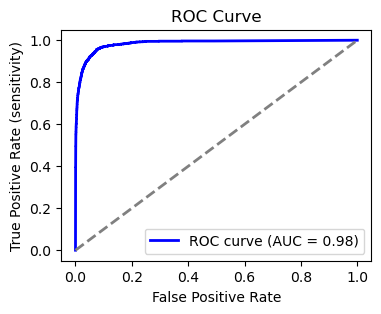

In [27]:
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Get weights for the features

In [28]:
feature_importances = pd.DataFrame({'feature_name': new_clf.feature_names_in_, 'importance': new_clf.feature_importances_})

In [29]:
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
6,PPI_rank_norm,0.360023
0,pubmed_mean_rank_norm,0.204637
9,sum_of_normalized_ranks,0.110631
5,GO_rank_norm,0.094966
2,kinase_rank_norm,0.051629
4,crisp_min_rank_norm,0.041550
1,tf_rank_norm,0.039419
3,crisp_mean_rank_norm,0.038210
7,expr_rank_norm,0.035269
8,expr_fold_rank_norm,0.023666


Export feature importance data

In [35]:
feature_importances.to_csv('Feature_importance.csv', index = False)

# Predictions for samples without known oncogenes
Now we take samples without known oncogenes and try to predict which genes are oncogenes in these samples: 
- ONE BY ONE, 
- USE PREDICT PROBA to get probabilities and not class labels
- all TSG were removed

In [36]:
new_data = pd.read_csv("Prediction_df_TCGA_HARTWIG_METASTATIC.csv")

In [37]:
new_data.shape

(8595, 19)

In [39]:
data_to_predict = new_data.iloc[:, 8:20]

In [40]:
data_to_predict.head()

,pubmed_mean_rank_norm,tf_rank_norm,kinase_rank_norm,crisp_mean_rank_norm,crisp_min_rank_norm,GO_rank_norm,PPI_rank_norm,expr_rank_norm,expr_fold_rank_norm,sum_of_normalized_ranks,sample_num
0,0.4,1.0,0.6,0.6,0.6,1.0,0.6,0.2,1.0,6.0,451
1,0.9,0.5,0.6,0.9,0.9,0.5,0.6,0.9,0.7,6.5,451
2,0.9,0.5,0.6,0.9,0.9,0.5,0.6,0.9,0.7,6.5,451
3,0.6,0.5,0.6,0.2,0.4,0.5,0.6,0.4,0.4,4.2,451
4,0.2,0.5,0.6,0.4,0.2,0.5,0.6,0.6,0.2,3.8,451


In [41]:
all_predictions = []
max_group = data_to_predict['sample_num'].max() + 1

for i in range(1, max_group):
    cur_data = data_to_predict[data_to_predict["sample_num"] == i]
    cur_data = cur_data.drop(columns=["sample_num"])
    all_predictions.append(new_clf.predict_proba(cur_data))

In [42]:
len(all_predictions)

853

In [43]:
all_predictions[0]

array([[0.53039029, 0.46960971],
       [0.74285662, 0.25714338],
       [0.8900955 , 0.1099045 ],
       [0.84374459, 0.15625541]])

In [44]:
clf.classes_

array([0, 1], dtype=int64)

In [45]:
import warnings


warnings.filterwarnings('ignore')

final_df =  data_to_predict[data_to_predict["sample_num"] == 1]
final_df["prob_of_onco"] = all_predictions[0].T[1]

for i in range(2, (len(all_predictions)+1)):
    cur_df = data_to_predict[data_to_predict["sample_num"] == i]
    onco_col = all_predictions[i-1].T[1]
    cur_df["prob_of_onco"] = onco_col
    final_df = pd.concat([final_df, cur_df])

    
final_df

,pubmed_mean_rank_norm,tf_rank_norm,kinase_rank_norm,crisp_mean_rank_norm,crisp_min_rank_norm,GO_rank_norm,PPI_rank_norm,expr_rank_norm,expr_fold_rank_norm,sum_of_normalized_ranks,sample_num,prob_of_onco
6453,0.25,0.62,0.62,0.25,0.25,0.50,1.00,0.25,1.00,4.74,1,0.469610
6454,1.00,0.62,0.62,1.00,1.00,1.00,0.50,1.00,0.75,7.49,1,0.257143
6455,0.75,0.62,0.62,0.50,0.50,0.50,0.50,0.75,0.25,4.99,1,0.109905
6456,0.50,0.62,0.62,0.75,0.75,0.50,0.50,0.50,0.50,5.24,1,0.156255
6145,0.25,0.62,0.50,1.00,0.75,0.75,0.38,1.00,0.25,5.50,2,0.010882
...,...,...,...,...,...,...,...,...,...,...,...,...
8339,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,850,0.999987
7355,0.50,0.75,0.75,1.00,0.50,0.50,0.75,0.50,0.50,5.75,851,0.475546
7356,1.00,0.75,0.75,0.50,1.00,1.00,0.75,1.00,1.00,7.75,851,0.571615
7188,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,852,0.999987


In [46]:
final_df["prob_of_onco"] = final_df["prob_of_onco"].round(4)

In [47]:
final_df.shape

(8595, 12)

In [48]:
result_df = new_data.join(pd.DataFrame(final_df.iloc[:, -1]))
result_df.shape

(8595, 20)

In [49]:
result_df

,sample,chr,startpos,endpos,copy_number,gene_name,Role.in.Cancer.COSMIC,Is.Oncogene.oncoKB,pubmed_mean_rank_norm,tf_rank_norm,kinase_rank_norm,crisp_mean_rank_norm,crisp_min_rank_norm,GO_rank_norm,PPI_rank_norm,expr_rank_norm,expr_fold_rank_norm,sum_of_normalized_ranks,sample_num,prob_of_onco
0,TCGA-85-A4JB,_8_31254_1060634,31254,1060634,20,ZNF596,No_data,No_data,0.4,1.0,0.6,0.6,0.6,1.0,0.6,0.2,1.0,6.0,451,0.1819
1,TCGA-85-A4JB,_8_31254_1060634,31254,1060634,20,FBXO25,No_data,No_data,0.9,0.5,0.6,0.9,0.9,0.5,0.6,0.9,0.7,6.5,451,0.2098
2,TCGA-85-A4JB,_8_31254_1060634,31254,1060634,20,FBXO25,No_data,No_data,0.9,0.5,0.6,0.9,0.9,0.5,0.6,0.9,0.7,6.5,451,0.2098
3,TCGA-85-A4JB,_8_31254_1060634,31254,1060634,20,TDRP,No_data,No_data,0.6,0.5,0.6,0.2,0.4,0.5,0.6,0.4,0.4,4.2,451,0.1387
4,TCGA-85-A4JB,_8_31254_1060634,31254,1060634,20,ERICH1,No_data,No_data,0.2,0.5,0.6,0.4,0.2,0.5,0.6,0.6,0.2,3.8,451,0.1326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,CPCT02040249T,_2_228436929_228956738,228436929,228956738,24,CCL20,No_data,No_data,1.0,0.6,0.6,0.2,0.2,0.8,1.0,0.5,0.5,5.4,93,0.7223
8591,CPCT02040249T,_2_228436929_228956738,228436929,228956738,24,DAW1,No_data,No_data,0.2,0.6,0.6,0.6,0.6,0.6,0.5,0.5,0.5,4.7,93,0.0678
8592,CPCT02040249T,_2_228436929_228956738,228436929,228956738,24,SLC19A3,No_data,No_data,0.8,0.6,0.6,1.0,1.0,0.3,0.5,0.5,0.5,5.8,93,0.1599
8593,CPCT02040249T,_2_228436929_230004731,228436929,230004731,18,SPHKAP,No_data,No_data,0.4,0.6,0.6,0.4,0.4,0.3,0.5,0.5,0.5,4.2,93,0.2115


Save df

In [50]:
result_df.to_csv('Predictions_by_RandomForestClassifier_TCGA_METASTATIC_HARTWIG.csv', index=False)

Save model

In [51]:
import pickle

# Save the trained model to a file
with open('random_forest_model_after_grid_search.pkl', 'wb') as f:
    pickle.dump(new_clf, f)